# Getting Started with Pandas
---


## Introduction

This session introduces the [pandas](https://pandas.pydata.org) package, which supports data processing in python.

Pandas makes it easier to build workflows that move between different kinds of task:

- Reading tabular data
- Tidying data
- Transforming data
- Data visualisation
- Applying statistical tests


If pandas is installed in your python environment, it's easy to import:

In [2]:
import pandas as pd

The file `planets.csv` is a [comma separated values](https://en.wikipedia.org/wiki/Comma-separated_values) (CSV) file that contains data about the planets in the solar system.

Take a look at the file in a text editor. 

### Question
What are the variables and what are their (fundamental) data types?

Why might this dataset be difficult to work with as a numpy array?

<hr>

## DataFrames

Pandas is built around a fundamental data table object called a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html).

Here's how you can load the data as a DataFrame:

In [3]:
planets = pd.read_csv('planets.csv')

The variable `planets` now points to a DataFrame object containing our data. 

In [4]:
planets

,name,type,mass,diameter,distance_from_sun,orbital_period,rings
0,Mercury,Terrestrial,0.0553,0.383,0.387,0.241,False
1,Venus,Terrestrial,0.8150,0.949,0.723,0.615,False
2,Earth,Terrestrial,1.0000,1.000,1.000,1.000,False
3,Mars,Terrestrial,0.1070,0.532,1.520,1.880,False
4,Jupiter,Gas giant,317.8000,11.210,5.200,11.900,True
5,Saturn,Gas giant,95.2000,9.450,9.580,29.400,True
6,Uranus,Ice giant,14.5000,4.010,19.200,83.700,True
7,Neptune,Ice giant,17.1000,3.880,30.050,163.700,True


Notice how our DataFrame contains data of different types. This is something that wouldn't be possible using a numpy `ndarray` (where every piece of data would have to be of the same type).

We can get a quick glimpse of the data using the [`head`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) method, which returns the first five rows:

In [5]:
planets.head(3)

,name,type,mass,diameter,distance_from_sun,orbital_period,rings
0,Mercury,Terrestrial,0.0553,0.383,0.387,0.241,False
1,Venus,Terrestrial,0.8150,0.949,0.723,0.615,False
2,Earth,Terrestrial,1.0000,1.000,1.000,1.000,False


The attribute [`shape`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html) holds the dimensions of the DataFrame as (#rows, #columns) :

In [6]:
planets.shape

(8, 7)

A pandas DataFrame has many other useful [methods](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#computations-descriptive-stats) and [attributes](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#attributes-and-underlying-data).

### Exercise

1. What do the following methods do?

[`tail`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html),
[`sample`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html),
[`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html),
[`copy`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html)



In [7]:
# planets.tail(3)
# planets.sample(3)
print(planets.describe().loc[['min', 'max']])
# a = planets.copy()
('mass' in planets.columns)
# for index, row in planets.iterrows():
#    print(f"Planet: {row['name']}, Type: {row['type']}")


         mass  diameter  distance_from_sun  orbital_period
min    0.0553     0.383              0.387           0.241
max  317.8000    11.210             30.050         163.700


True

2. To what do the following attributes refer?

[`size`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.size.html),
[`dtypes`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html),
[`columns`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html),
[`values`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html)

In [8]:
planets.values


array([['Mercury', 'Terrestrial', 0.0553, 0.383, 0.387, 0.241, False],
       ['Venus', 'Terrestrial', 0.815, 0.949, 0.723, 0.615, False],
       ['Earth', 'Terrestrial', 1.0, 1.0, 1.0, 1.0, False],
       ['Mars', 'Terrestrial', 0.107, 0.532, 1.52, 1.88, False],
       ['Jupiter', 'Gas giant', 317.8, 11.21, 5.2, 11.9, True],
       ['Saturn', 'Gas giant', 95.2, 9.45, 9.58, 29.4, True],
       ['Uranus', 'Ice giant', 14.5, 4.01, 19.2, 83.7, True],
       ['Neptune', 'Ice giant', 17.1, 3.88, 30.05, 163.7, True]],
      dtype=object)

---
## Accessing by position

Pandas provides several different ways to get data out of the DataFrame.

[`iloc[]`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html) means "**loc**ate data by **i**nteger position". 

It is used to access subsets of rows and columns, using the same coordinate system as `iat[]`.

### Selecting rows

We can use `iloc[]` with a slice to get a subset of rows:

In [9]:
planets.iloc[[range(3), 5, 6]]

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

Because *slicing rows* is such a common operation, pandas also provides a shortcut:

In [48]:
planets[2:4]

,name,type,mass,diameter,distance_from_sun,orbital_period,rings
2,Earth,Terrestrial,1.000,1.000,1.00,1.00,False
3,Mars,Terrestrial,0.107,0.532,1.52,1.88,False


Alternatively, we can provide `iloc[]` with a list of the indices to select:

In [51]:
planets.iloc[[1,3,5]]

,name,type,mass,diameter,distance_from_sun,orbital_period,rings
1,Venus,Terrestrial,0.815,0.949,0.723,0.615,False
3,Mars,Terrestrial,0.107,0.532,1.520,1.880,False
5,Saturn,Gas giant,95.200,9.450,9.580,29.400,True


#### Exercise

1. Select the last three rows.

In [62]:
planets[-3:]

,name,type,mass,diameter,distance_from_sun,orbital_period,rings
5,Saturn,Gas giant,95.2,9.45,9.58,29.4,True
6,Uranus,Ice giant,14.5,4.01,19.20,83.7,True
7,Neptune,Ice giant,17.1,3.88,30.05,163.7,True


2. Select three rows at random.

In [59]:
planets.sample(3)

,name,type,mass,diameter,distance_from_sun,orbital_period,rings
6,Uranus,Ice giant,14.5000,4.010,19.200,83.700,True
0,Mercury,Terrestrial,0.0553,0.383,0.387,0.241,False
5,Saturn,Gas giant,95.2000,9.450,9.580,29.400,True


3. Make a DataFrame containing only the first row.

In [75]:
planets.iloc[0]
# planets.iloc[:1]

name                     Mercury
type                 Terrestrial
mass                      0.0553
diameter                   0.383
distance_from_sun          0.387
orbital_period             0.241
rings                      False
Name: 0, dtype: object

4. Make a DataFrame containing the first, second and last rows.

In [87]:
planets.iloc[[0, 1, -1]]

,name,type,mass,diameter,distance_from_sun,orbital_period,rings
0,Mercury,Terrestrial,0.0553,0.383,0.387,0.241,False
1,Venus,Terrestrial,0.8150,0.949,0.723,0.615,False
7,Neptune,Ice giant,17.1000,3.880,30.050,163.700,True


### Selecting columns

We can access columns by integer using the second axis of `iloc[]`:


In [79]:
a = planets.iloc[:,2]
a

0      0.0553
1      0.8150
2      1.0000
3      0.1070
4    317.8000
5     95.2000
6     14.5000
7     17.1000
Name: mass, dtype: float64

Using an integer index (e.g. `2` above), this returns the column values in the form of a pandas [Series](https://pandas.pydata.org/pandas-docs/stable/reference/series.html) object. 

Here's how to return the same column as a DataFrame:

In [80]:
planets.iloc[:,[2,3]]

,mass,diameter
0,0.0553,0.383
1,0.8150,0.949
2,1.0000,1.000
3,0.1070,0.532
4,317.8000,11.210
5,95.2000,9.450
6,14.5000,4.010
7,17.1000,3.880


Notice that we still need to provide a placeholder `:` before the comma, to indicate "all of the rows".

Using a slice or list after the comma returns a subset of columns:

In [81]:
planets.iloc[:,2:4]

,mass,diameter
0,0.0553,0.383
1,0.8150,0.949
2,1.0000,1.000
3,0.1070,0.532
4,317.8000,11.210
5,95.2000,9.450
6,14.5000,4.010
7,17.1000,3.880


However, accessing columns by position is not usually very convenient. We need to be able to refer to the columns by their *labels*.

## Accessing by label
[`loc[]`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) means "locate by label". Our columns are labelled with strings.


In [82]:
planets.loc[:,'name']

0    Mercury
1      Venus
2      Earth
3       Mars
4    Jupiter
5     Saturn
6     Uranus
7    Neptune
Name: name, dtype: object

This returns a Series object, which represents the data from a single column. The numbers shown next to the values are the *row labels*.

As a shortcut, we can also use `[]` with the *column labels* to select specified columns:

In [83]:
planets['name']

0    Mercury
1      Venus
2      Earth
3       Mars
4    Jupiter
5     Saturn
6     Uranus
7    Neptune
Name: name, dtype: object

As an even shorter shortcut, column names are often actually usable as attributes:

In [91]:
# planets.name
planets[['name']]

,name
0,Mercury
1,Venus
2,Earth
3,Mars
4,Jupiter
5,Saturn
6,Uranus
7,Neptune


(there are some issues with doing this though, so in general the square brackets are preferable.)

A list can be used to select multiple columns.

In [88]:
planets[['name','mass']]

,name,mass
0,Mercury,0.0553
1,Venus,0.8150
2,Earth,1.0000
3,Mars,0.1070
4,Jupiter,317.8000
5,Saturn,95.2000
6,Uranus,14.5000
7,Neptune,17.1000


### Exercise

1. Select the first three rows, but only the **name** and **diameter** columns.

In [105]:
planets[['name', 'diameter']].head(3)

,name,diameter
0,Mercury,0.383
1,Venus,0.949
2,Earth,1.000


2. Select the first two columns for rows 4 and 6.

In [107]:
planets.iloc[[3,5],:2]

,name,type
3,Mars,Terrestrial
5,Saturn,Gas giant


In [25]:
planets.loc[2,['name','mass','diameter']]

name        Earth
mass          1.0
diameter      1.0
Name: 2, dtype: object

3. Make a plot of `distance_from_sun` vs `orbital period`.

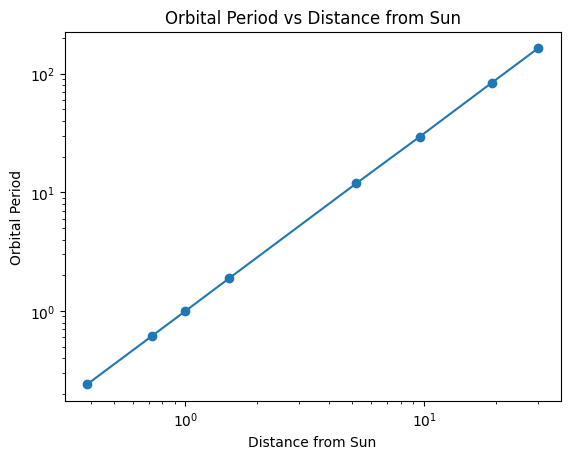

In [18]:

import matplotlib.pyplot as plt
distance = planets['distance_from_sun']
orbital_period = planets['orbital_period']

plt.xlabel('Distance from Sun')
plt.ylabel('Orbital Period')
plt.title('Orbital Period vs Distance from Sun')
plt.yscale('log')
plt.xscale('log')
plt.plot(distance, orbital_period, marker='o')

plt.show()

***

## Querying and sorting data

Of course, we are not just limited to accessing data by position and label.

Here are a couple of useful DataFrame methods for basic data manipulation:

### [`query`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html)
selects rows according to whatever conditions we specify, e.g.:

In [44]:
planets.query('"len("name")" >= 4')

SyntaxError: invalid syntax (<unknown>, line 1)

In [16]:
planets.query('diameter >= 1')

,name,type,mass,diameter,distance_from_sun,orbital_period,rings
2,Earth,Terrestrial,1.0,1.00,1.00,1.0,False
4,Jupiter,Gas giant,317.8,11.21,5.20,11.9,True
5,Saturn,Gas giant,95.2,9.45,9.58,29.4,True
6,Uranus,Ice giant,14.5,4.01,19.20,83.7,True
7,Neptune,Ice giant,17.1,3.88,30.05,163.7,True


Note that the query is a Boolean expression, provided as a string `''`. 

Inside the query, column names are unquoted and string values are quoted using `""`.

We can refer to columns containing spaces by enclosing them in backticks ` `` `.

We can also refer to variables in the environment using the `@` prefix.

In [26]:
max_period = 30
planets.query('rings and orbital_period < @max_period')

,name,type,mass,diameter,distance_from_sun,orbital_period,rings
4,Jupiter,Gas giant,317.8,11.21,5.20,11.9,True
5,Saturn,Gas giant,95.2,9.45,9.58,29.4,True


### [`sort_values`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)

returns a copy of the DataFrame, sorted by ascending column value:

In [27]:
planets.sort_values('diameter')

,name,type,mass,diameter,distance_from_sun,orbital_period,rings
0,Mercury,Terrestrial,0.0553,0.383,0.387,0.241,False
3,Mars,Terrestrial,0.1070,0.532,1.520,1.880,False
1,Venus,Terrestrial,0.8150,0.949,0.723,0.615,False
2,Earth,Terrestrial,1.0000,1.000,1.000,1.000,False
7,Neptune,Ice giant,17.1000,3.880,30.050,163.700,True
6,Uranus,Ice giant,14.5000,4.010,19.200,83.700,True
5,Saturn,Gas giant,95.2000,9.450,9.580,29.400,True
4,Jupiter,Gas giant,317.8000,11.210,5.200,11.900,True


...or by descending value using `ascending=False`:

In [28]:
planets.sort_values('diameter', ascending=False)

,name,type,mass,diameter,distance_from_sun,orbital_period,rings
4,Jupiter,Gas giant,317.8000,11.210,5.200,11.900,True
5,Saturn,Gas giant,95.2000,9.450,9.580,29.400,True
6,Uranus,Ice giant,14.5000,4.010,19.200,83.700,True
7,Neptune,Ice giant,17.1000,3.880,30.050,163.700,True
2,Earth,Terrestrial,1.0000,1.000,1.000,1.000,False
1,Venus,Terrestrial,0.8150,0.949,0.723,0.615,False
3,Mars,Terrestrial,0.1070,0.532,1.520,1.880,False
0,Mercury,Terrestrial,0.0553,0.383,0.387,0.241,False


The original DataFrame is unchanged:

In [29]:
planets

,name,type,mass,diameter,distance_from_sun,orbital_period,rings
0,Mercury,Terrestrial,0.0553,0.383,0.387,0.241,False
1,Venus,Terrestrial,0.8150,0.949,0.723,0.615,False
2,Earth,Terrestrial,1.0000,1.000,1.000,1.000,False
3,Mars,Terrestrial,0.1070,0.532,1.520,1.880,False
4,Jupiter,Gas giant,317.8000,11.210,5.200,11.900,True
5,Saturn,Gas giant,95.2000,9.450,9.580,29.400,True
6,Uranus,Ice giant,14.5000,4.010,19.200,83.700,True
7,Neptune,Ice giant,17.1000,3.880,30.050,163.700,True


### Exercise

Use manipulations of `planets` to make DataFrames containing the following:

1. the terrestrial planets, ordered by increasing orbital period.

In [42]:
planets.query('type=="Terrestrial"').sort_values(['orbital_period'])

,name,type,mass,diameter,distance_from_sun,orbital_period,rings
0,Mercury,Terrestrial,0.0553,0.383,0.387,0.241,False
1,Venus,Terrestrial,0.8150,0.949,0.723,0.615,False
2,Earth,Terrestrial,1.0000,1.000,1.000,1.000,False
3,Mars,Terrestrial,0.1070,0.532,1.520,1.880,False


2. the giant planets, ordered from largest to smallest.

In [43]:
planets.query('type == "Gas giant" or type == "Ice giant"').sort_values('mass', ascending=False)

,name,type,mass,diameter,distance_from_sun,orbital_period,rings
4,Jupiter,Gas giant,317.8,11.21,5.20,11.9,True
5,Saturn,Gas giant,95.2,9.45,9.58,29.4,True
7,Neptune,Ice giant,17.1,3.88,30.05,163.7,True
6,Uranus,Ice giant,14.5,4.01,19.20,83.7,True


3. the planets that are more massive than Neptune.

In [40]:
neptune_mass = planets.query('name == "Neptune"')['mass'].values[0]
print(f"Neptune mass: {neptune_mass}")
planets.query('mass > @neptune_mass')   

Neptune mass: 17.1


,name,type,mass,diameter,distance_from_sun,orbital_period,rings
4,Jupiter,Gas giant,317.8,11.21,5.20,11.9,True
5,Saturn,Gas giant,95.2,9.45,9.58,29.4,True


In [72]:
planets[planets['name'].str.len() > 5]

,name,type,mass,diameter,distance_from_sun,orbital_period,rings
0,Mercury,Terrestrial,0.0553,0.383,0.387,0.241,False
4,Jupiter,Gas giant,317.8000,11.210,5.200,11.900,True
5,Saturn,Gas giant,95.2000,9.450,9.580,29.400,True
6,Uranus,Ice giant,14.5000,4.010,19.200,83.700,True
7,Neptune,Ice giant,17.1000,3.880,30.050,163.700,True


In [58]:
neptune_mass = planets[planets['name'] == "Neptune"]
print(neptune_mass)  

      name       type  mass  diameter  distance_from_sun  orbital_period  \
7  Neptune  Ice giant  17.1      3.88              30.05           163.7   

   rings  
7   True  


***

## Making new columns from existing ones

It's easy to add a new column to a DataFrame. We just use `[]=` to assign a Series to a new column label:

In [45]:
df = planets.copy()
df['radius'] = df['diameter'] / 2
df

,name,type,mass,diameter,distance_from_sun,orbital_period,rings,radius
0,Mercury,Terrestrial,0.0553,0.383,0.387,0.241,False,0.1915
1,Venus,Terrestrial,0.8150,0.949,0.723,0.615,False,0.4745
2,Earth,Terrestrial,1.0000,1.000,1.000,1.000,False,0.5000
3,Mars,Terrestrial,0.1070,0.532,1.520,1.880,False,0.2660
4,Jupiter,Gas giant,317.8000,11.210,5.200,11.900,True,5.6050
5,Saturn,Gas giant,95.2000,9.450,9.580,29.400,True,4.7250
6,Uranus,Ice giant,14.5000,4.010,19.200,83.700,True,2.0050
7,Neptune,Ice giant,17.1000,3.880,30.050,163.700,True,1.9400


Note that Series objects combine in a row-wise manner, similar to numpy arrays, e.g.:

In [46]:
planets['name'] + " -- " + planets['type']

0    Mercury -- Terrestrial
1      Venus -- Terrestrial
2      Earth -- Terrestrial
3       Mars -- Terrestrial
4      Jupiter -- Gas giant
5       Saturn -- Gas giant
6       Uranus -- Ice giant
7      Neptune -- Ice giant
dtype: object

### Exercise

Add a new column to `planets` to show the density of each planet relative to Earth.


In [50]:
import numpy as np
df = planets.copy()
df['density'] = planets['mass'] / ((4/3) * np.pi * (planets['diameter']/2)**3)
dE=df.query('name == "Earth"')['density'].values[0]
df.density = df.density / dE
df

,name,type,mass,diameter,distance_from_sun,orbital_period,rings,density
0,Mercury,Terrestrial,0.0553,0.383,0.387,0.241,False,0.984303
1,Venus,Terrestrial,0.8150,0.949,0.723,0.615,False,0.953584
2,Earth,Terrestrial,1.0000,1.000,1.000,1.000,False,1.000000
3,Mars,Terrestrial,0.1070,0.532,1.520,1.880,False,0.710639
4,Jupiter,Gas giant,317.8000,11.210,5.200,11.900,True,0.225599
5,Saturn,Gas giant,95.2000,9.450,9.580,29.400,True,0.112808
6,Uranus,Ice giant,14.5000,4.010,19.200,83.700,True,0.224872
7,Neptune,Ice giant,17.1000,3.880,30.050,163.700,True,0.292753


## Working with Excel files

Take a look at the Excel workbook `data_geographies_v1.xlsx`.

We can use the `read_excel` function to load data from the relevant sheet in the Excel workbook. This can read both xls and xlsx files and detects the format from the extension.

We only want to import a single sheet (named `list-of-countries-etc`) from this workbook.

In [10]:
countries = pd.read_excel("data_geographies_v1.xlsx", sheet_name = "list-of-countries-etc")

The variable `countries` now points to a `DataFrame` object containing our data.

In [11]:
countries.head()

,geo,name,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,"World bank, 4 income groups 2017"
0,afg,Afghanistan,asia,asia_west,south_asia,g77,33.00000,66.00000,1946-11-19,South Asia,Low income
1,alb,Albania,europe,europe_east,europe_central_asia,others,41.00000,20.00000,1955-12-14,Europe & Central Asia,Upper middle income
2,dza,Algeria,africa,africa_north,middle_east_north_africa,g77,28.00000,3.00000,1962-10-08,Middle East & North Africa,Upper middle income
3,and,Andorra,europe,europe_west,europe_central_asia,others,42.50779,1.52109,1993-07-28,Europe & Central Asia,High income
4,ago,Angola,africa,africa_sub_saharan,sub_saharan_africa,g77,-12.50000,18.50000,1976-12-01,Sub-Saharan Africa,Lower middle income


### Exercise



Use manipulations of `countries` to complete the following tasks:


1. Find all the countries that are south of the equator.

2. Find the first eight African countries to join the UN.

3. Make an array of OECD country names, sorted from East to West.

---